<a href="https://colab.research.google.com/github/Allen123321/DEMO-DL/blob/master/K_Means%E7%AE%97%E6%B3%95%E5%92%8CMini_Batch_K_Means%E7%AE%97%E6%B3%95%E6%AF%94%E8%BE%83.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
### 基于scikit包中的创建模拟数据的API创建聚类数据，使用K-means算法和MiniBatch K-Means算法对数据进行分类操作，比较这两种算法的聚类效果以及聚类的消耗时间长度
### K-means： http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans
### MiniBatchKMeans：http://scikit-learn.org/stable/modules/generated/sklearn.cluster.MiniBatchKMeans.html#sklearn.cluster.MiniBatchKMeans

import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.datasets import make_blobs

In [3]:
#初始化三个中心
centers = [[1, 1], [-1, -1], [1, -1]]
clusters = len(centers)  #聚类的数目为3
#产生3000组二维的数据，中心点三个，标准差0.7
X, Y = make_blobs(n_samples=3000, centers=centers, cluster_std=0.7, random_state=28)

In [4]:
#构建kmeans算法
k_means = KMeans(init='k-means++', n_clusters=clusters, random_state=28)
t0 = time.time() #当前时间
k_means.fit(X)  #训练模型
km_batch = time.time() - t0  #使用kmeans训练数据的消耗时间
print ("K-Means算法模型训练消耗时间:%.4fs" % km_batch)

K-Means算法模型训练消耗时间:0.0694s


In [5]:
#构建MiniBatchKMeans算法
batch_size = 100 # 每次取样大小
mbk = MiniBatchKMeans(init='k-means++', n_clusters=clusters, batch_size=batch_size, random_state=28)
t0 = time.time()
mbk.fit(X)
mbk_batch = time.time() - t0
print ("Mini Batch K-Means算法模型训练消耗时间:%.4fs" % mbk_batch)


Mini Batch K-Means算法模型训练消耗时间:0.0620s


In [10]:
#预测结果
km_y_hat = k_means.predict(X)
mbkm_y_hat = mbk.predict(X)
print(km_y_hat)
print(mbkm_y_hat)

[0 1 1 ... 2 2 0]
[1 0 0 ... 2 2 1]


In [8]:
##获取聚类中心点并聚类中心点进行排序
k_means_cluster_centers = k_means.cluster_centers_ # 输出kmeans聚类中心点
mbk_means_cluster_centers = mbk.cluster_centers_ # 输出mbm聚类中心点
print ("K-Means算法聚类中心点:\ncenter=", k_means_cluster_centers)
print ("Mini Batch K-Means算法聚类中心点:\ncenter=", mbk_means_cluster_centers)
order = pairwise_distances_argmin(k_means_cluster_centers,
                                  mbk_means_cluster_centers)
print(order)

K-Means算法聚类中心点:
center= [[-1.05590494 -1.05977282]
 [ 1.01491055  1.02216649]
 [ 1.03405672 -1.07121074]]
Mini Batch K-Means算法聚类中心点:
center= [[ 0.99602094  1.10688195]
 [-1.00828286 -1.05983915]
 [ 1.07892315 -0.94286826]]
[1 0 2]


In [12]:
### 聚类效果评估
from sklearn import metrics
score_funcs = [
    metrics.adjusted_rand_score,# 兰德指数，计算样本预测值和真实值之间的相似度
    metrics.v_measure_score, # 均一性和完整性的加权平均
    metrics.adjusted_mutual_info_score, # 调整后的互信息
    metrics.mutual_info_score, # 互信息
]

## 2. 迭代对每个评估函数进行评估操作
for score_func in score_funcs:
    t0 = time.time()
    km_scores = score_func(Y,km_y_hat)
    print("K-Means算法:%s评估函数计算结果值:%.5f；计算消耗时间:%0.3fs" % (score_func.__name__,km_scores, time.time() - t0))
    
    t0 = time.time()
    mbkm_scores = score_func(Y,mbkm_y_hat)
    print("Mini Batch K-Means算法:%s评估函数计算结果值:%.5f；计算消耗时间:%0.3fs\n" % (score_func.__name__,mbkm_scores, time.time() - t0))

K-Means算法:adjusted_rand_score评估函数计算结果值:0.72452；计算消耗时间:0.013s
Mini Batch K-Means算法:adjusted_rand_score评估函数计算结果值:0.72421；计算消耗时间:0.003s

K-Means算法:v_measure_score评估函数计算结果值:0.65678；计算消耗时间:0.003s
Mini Batch K-Means算法:v_measure_score评估函数计算结果值:0.65780；计算消耗时间:0.002s

K-Means算法:adjusted_mutual_info_score评估函数计算结果值:0.65657；计算消耗时间:0.006s
Mini Batch K-Means算法:adjusted_mutual_info_score评估函数计算结果值:0.65759；计算消耗时间:0.005s

K-Means算法:mutual_info_score评估函数计算结果值:0.72147；计算消耗时间:0.002s
Mini Batch K-Means算法:mutual_info_score评估函数计算结果值:0.72264；计算消耗时间:0.002s



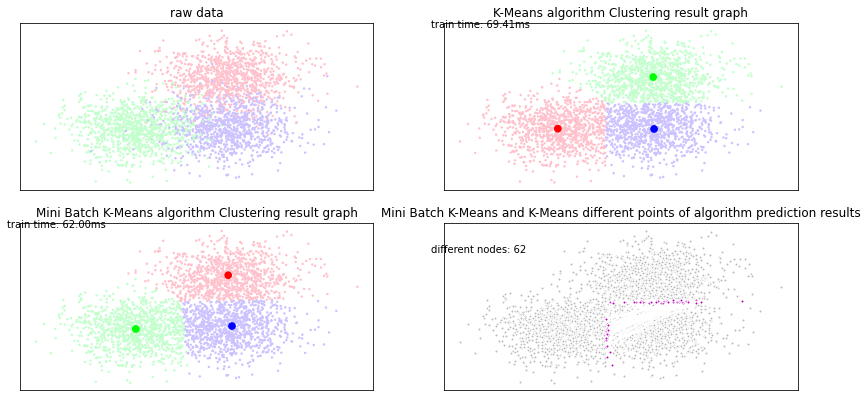

In [9]:
## 画图
plt.figure(figsize=(12, 6), facecolor='w')
plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.9)
cm = mpl.colors.ListedColormap(['#FFC2CC', '#C2FFCC', '#CCC2FF'])
cm2 = mpl.colors.ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
#子图1：原始数据
plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=Y, s=6, cmap=cm, edgecolors='none')
plt.title(u'raw data')
plt.xticks(())
plt.yticks(())
plt.grid(True)
#子图2：K-Means算法聚类结果图
plt.subplot(222)
plt.scatter(X[:,0], X[:,1], c=km_y_hat, s=6, cmap=cm,edgecolors='none')
plt.scatter(k_means_cluster_centers[:,0], k_means_cluster_centers[:,1],c=range(clusters),s=60,cmap=cm2,edgecolors='none')
plt.title(u'K-Means algorithm Clustering result graph')
plt.xticks(())
plt.yticks(())
plt.text(-3.8, 3,  'train time: %.2fms' % (km_batch*1000))
plt.grid(True)
#子图三Mini Batch K-Means算法聚类结果图
plt.subplot(223)
plt.scatter(X[:,0], X[:,1], c=mbkm_y_hat, s=6, cmap=cm,edgecolors='none')
plt.scatter(mbk_means_cluster_centers[:,0], mbk_means_cluster_centers[:,1],c=range(clusters),s=60,cmap=cm2,edgecolors='none')
plt.title(u'Mini Batch K-Means algorithm Clustering result graph')
plt.xticks(())
plt.yticks(())
plt.text(-3.8, 3,  'train time: %.2fms' % (mbk_batch*1000))
plt.grid(True)
#
different = list(map(lambda x: (x!=0) & (x!=1) & (x!=2), mbkm_y_hat))
for k in range(clusters):
    different += ((km_y_hat == k) != (mbkm_y_hat == order[k]))
identic = np.logical_not(different)
different_nodes = len(list(filter(lambda x:x, different)))

plt.subplot(224)
plt.plot(X[identic, 0], X[identic, 1], 'w', markerfacecolor='#bbbbbb', marker='.')
plt.plot(X[different, 0], X[different, 1], 'w', markerfacecolor='m', marker='.')
plt.title(u'Mini Batch K-Means and K-Means different points of algorithm prediction results')
plt.xticks(())
plt.yticks(())
plt.text(-3.8, 2,  'different nodes: %d' % (different_nodes))

plt.show()

# 当处理超大数据量时，效率是最重要的诉求
# 相比kmeans，Mini Batch K-Means算法效果没有降低很多，但是效率提升很多